In [1]:
import os

import geopandas as gpd
import pandas as pd
import numpy as np
import momepy as mm
import networkx as nx

from sqlalchemy import create_engine

import matplotlib.pyplot as plt

user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(url)

In [2]:
x, y = 338286, 392077  # coordinates in epsg 27700
buffer = 400  # radius in [m]

In [56]:
def pgselect(table, buffer=400, x=338286, y=392077):
    user = os.environ.get('DB_USERNAME')
    pwd = os.environ.get('DB_PASSWORD')
    host = os.environ.get('DB_HOSTNAME')
    port = os.environ.get('DB_PORT')

    url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
    engine = create_engine(url)
    sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'
    return gpd.read_postgis(sql, engine, geom_col='geometry')

In [57]:
roads = pgselect('openroads')

In [58]:
buildings = pgselect('openmaplocal')

In [59]:
pp = pgselect('openuprn')

In [32]:
all_roads = gpd.read_postgis('SELECT * FROM openroads', engine, geom_col='geometry')

In [34]:
counts = pd.DataFrame(all_roads.roadFunction.value_counts())

In [36]:
counts

,roadFunction
Local Road,1650781
Restricted Local Access Road,803087
Minor Road,676167
A Road,285536
B Road,159415
Secondary Access Road,133522
Local Access Road,45307
Motorway,7124


In [37]:
desc = all_roads.groupby('roadFunction').describe()

In [50]:
groupdf = desc['length']

In [54]:
groupdf.loc['Motorway']

count     7124.000000
mean       688.381387
std       1465.757432
min          1.000000
25%         85.000000
50%        327.500000
75%        570.000000
max      19085.000000
Name: Motorway, dtype: float64

In [52]:
all_roads.describe()

,length
count,3.760939e+06
mean,1.501755e+02
std,2.643848e+02
min,1.000000e+00
25%,4.300000e+01
50%,7.600000e+01
75%,1.460000e+02
max,1.919100e+04


In [55]:
groupdf.T

roadFunction,A Road,B Road,Local Access Road,Local Road,Minor Road,Motorway,Restricted Local Access Road,Secondary Access Road
count,285536.000000,159415.000000,45307.000000,1.650781e+06,676167.000000,7124.000000,803087.000000,133522.000000
mean,172.555321,189.976790,133.988986,9.177380e+01,235.294568,688.381387,192.359896,68.841502
std,335.392540,304.465496,224.455677,9.921746e+01,345.904518,1465.757432,326.549063,47.501448
min,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,33.000000,39.000000,44.000000,4.300000e+01,43.000000,85.000000,50.000000,39.000000
50%,69.000000,85.000000,73.000000,6.800000e+01,101.000000,327.500000,100.000000,53.000000
75%,169.000000,204.000000,137.000000,1.090000e+02,275.000000,570.000000,200.000000,86.000000
max,13410.000000,11745.000000,7582.000000,7.512000e+03,19191.000000,19085.000000,16798.000000,689.000000


In [44]:
all_roads.columns

Index(['id', 'endNode', 'startNode', 'roadNumberTOID', 'roadNameTOID',
       'fictitious', 'roadClassification', 'roadFunction', 'formOfWay',
       'length', 'length_uom', 'loop', 'primaryRoute', 'trunkRoad',
       'roadClassificationNumber', 'name1', 'name1_lang', 'name2',
       'name2_lang', 'roadStructure', 'geometry'],
      dtype='object')

In [42]:
mways = all_roads.loc[all_roads.roadFunction=='Motorway']
aroads = all_roads.loc[all_roads.roadFunction=='A Road']

<AxesSubplot:>

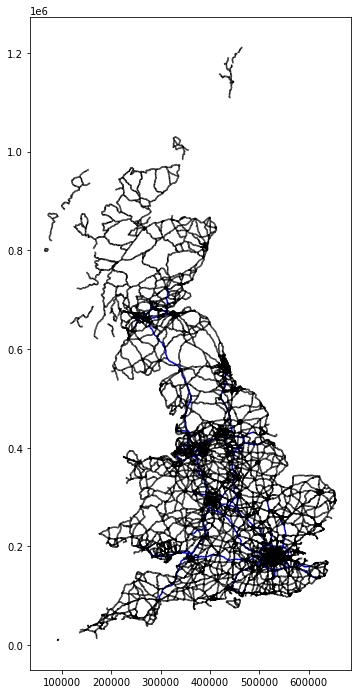

In [43]:
fig, ax = plt.subplots(figsize=(12,12))
mways.plot(ax=ax, color='blue')
aroads.plot(ax=ax, color='k')

In [66]:
cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

<AxesSubplot:>

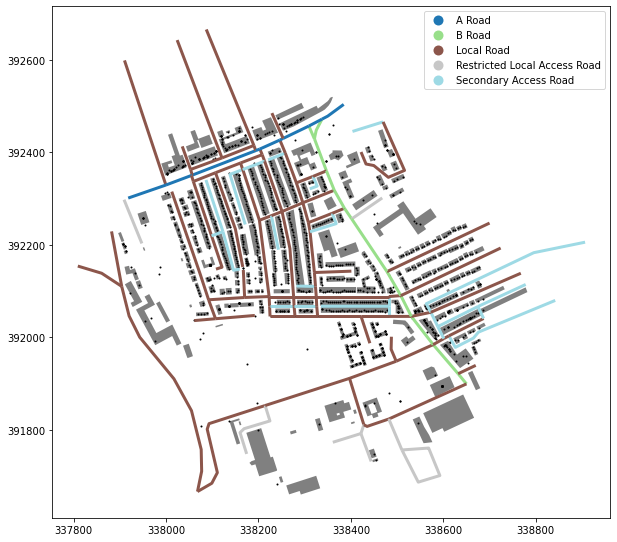

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
roads.plot('roadFunction', ax=ax, legend=True, cmap=cmaps[-3], linewidth=3)
buildings.plot(ax=ax, color='grey')
pp.plot(ax=ax, color='k', markersize=1)

In [11]:
roads.columns

Index(['id', 'endNode', 'startNode', 'roadNumberTOID', 'roadNameTOID',
       'fictitious', 'roadClassification', 'roadFunction', 'formOfWay',
       'length', 'length_uom', 'loop', 'primaryRoute', 'trunkRoad',
       'roadClassificationNumber', 'name1', 'name1_lang', 'name2',
       'name2_lang', 'roadStructure', 'geometry'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

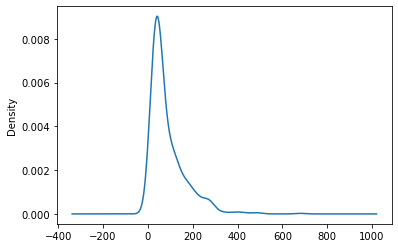

In [15]:
roads.length.plot.kde()